Sinh viên: Huỳnh Thiện Tùng (19522492)

Bài tập 3 Cài đặt Softmax Regression với Tensorflow/Pytorch

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


# Dataset
Sử dụng tập MNIST dataset

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Trực quan dữ liệu

Shape of Images:  (60000, 28, 28)
Shape of Labels: (60000,)


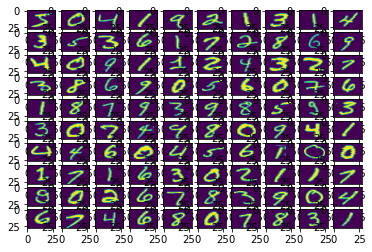

In [3]:
print("Shape of Images: ", x_train.shape)
print("Shape of Labels:" , y_train.shape)

fig,ax = plt.subplots(10,10) 
k = 0
for i in range(10): 
    for j in range(10): 
        ax[i][j].imshow(x_train[k], aspect='auto') 
        k += 1
plt.show()

# Hyperparameters

In [4]:
num_features = 784 # 28*28
num_labels = 10
learning_rate = 0.001
batch_size = 32
training_epochs = 30
display_step = 1

# OneHot encoding

In [5]:
def to_onehot(y):
    data = np.zeros((num_labels))
    data[y] = 1
    return data

x_train = np.reshape(x_train, (-1, num_features))
x_test = np.reshape(x_test, (-1, num_features))

y_train = np.array([to_onehot(y) for y in y_train])
y_test = np.array([to_onehot(y) for y in y_test])

In [6]:
x_train.shape, y_train.shape

((60000, 784), (60000, 10))

In [7]:
x = tf.placeholder(tf.float32, shape=[None, num_features])
y = tf.placeholder(tf.float32, shape=[None, num_labels])

In [8]:
# Weight
W = tf.Variable(tf.zeros([num_features, num_labels]))

# Bias
b = tf.Variable(tf.zeros([num_labels]))

In [9]:
pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))

# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [10]:
def accuracy(predictions, labels): 
    correctly_predicted = np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1)) 
    acc = (100.0 * correctly_predicted) / predictions.shape[0] 
    return acc

In [11]:
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # History variables
    train_acc, train_loss, test_acc, test_loss = [], [], [], []
    
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.0
        avg_acc = 0.0
        total_batch = len(x_train)//batch_size
        
        for i in range(total_batch):
            batch_x = x_train[i:i+1*batch_size]
            batch_y = y_train[i:i+1*batch_size]
            
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
            avg_cost += c/total_batch
            
            pred_y = sess.run(pred, feed_dict={x: batch_x})
            acc = accuracy(pred_y, batch_y)
            avg_acc += acc/total_batch
            
            
        if (epoch+1) % display_step == 0:
            tc = sess.run(cost, feed_dict={x: x_test, y: y_test})
            pred_y = sess.run(pred, feed_dict={x: x_test})
            ta = accuracy(pred_y, y_test)
            
            print("Epoch: {:2.0f} - Cost: {:1.5f} - Acc: {:0.5f} - Test Cost: {:0.5f} - Test Acc: {:0.5f}".format(
                epoch+1, avg_cost, avg_acc, tc, ta))
            train_acc.append(avg_acc)
            train_loss.append(avg_cost)
            test_acc.append(ta)
            test_loss.append(tc)
            
    print("Optimization Finshed")
    
    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Test Accuracy:", acc.eval({x: x_test, y: y_test}))

Epoch:  1 - Cost: 1.62461 - Acc: 73.62000 - Test Cost: 1.23438 - Test Acc: 77.73000
Epoch:  2 - Cost: 1.00996 - Acc: 83.20833 - Test Cost: 0.91878 - Test Acc: 81.09000
Epoch:  3 - Cost: 0.79427 - Acc: 84.88667 - Test Cost: 0.77765 - Test Acc: 82.72000
Epoch:  4 - Cost: 0.68457 - Acc: 86.03833 - Test Cost: 0.69650 - Test Acc: 83.87000
Epoch:  5 - Cost: 0.61639 - Acc: 87.03833 - Test Cost: 0.64296 - Test Acc: 84.66000
Epoch:  6 - Cost: 0.56889 - Acc: 87.69000 - Test Cost: 0.60460 - Test Acc: 85.15000
Epoch:  7 - Cost: 0.53331 - Acc: 88.29500 - Test Cost: 0.57556 - Test Acc: 85.52000
Epoch:  8 - Cost: 0.50531 - Acc: 88.73500 - Test Cost: 0.55271 - Test Acc: 85.98000
Epoch:  9 - Cost: 0.48247 - Acc: 89.14667 - Test Cost: 0.53422 - Test Acc: 86.29000
Epoch: 10 - Cost: 0.46332 - Acc: 89.40000 - Test Cost: 0.51892 - Test Acc: 86.49000
Epoch: 11 - Cost: 0.44692 - Acc: 89.68333 - Test Cost: 0.50604 - Test Acc: 86.71000
Epoch: 12 - Cost: 0.43264 - Acc: 89.83167 - Test Cost: 0.49504 - Test Acc: 8

Visualize the results

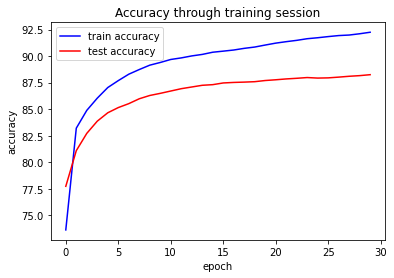

In [24]:
plt.plot(train_acc, 'b', label='train accuracy')
plt.plot(test_acc, 'r', label='test accuracy')
plt.legend(loc='upper left')
plt.title('Accuracy through training session')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

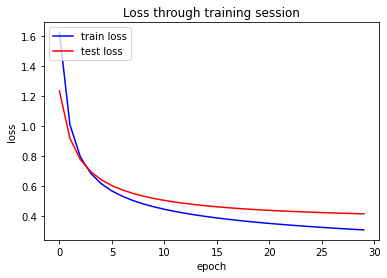

In [26]:
plt.plot(train_loss, 'b', label='train loss')
plt.plot(test_loss, 'r', label='test loss')
plt.legend(loc='upper left')
plt.title('Loss through training session')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()